In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
"""
Build the linear regression model using scikit learn in boston data to
predict 'Price' based on other dependent variable.
Here is the code to load the data:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
Task: Deploy this assignment in any cloud platform.(Try to look for
free cloud platform)
Assignment: Submit assignment’s deployable link only.
"""

import numpy as np
import pandas as pd
import scipy.stats as stats

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:

bos_X = pd.DataFrame(boston.data,columns=boston.feature_names)
bos_y = pd.DataFrame(boston.target,columns=['MEDV'])

In [6]:
bos_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bos_y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
bos=pd.concat([bos_X,bos_y],axis=1)

In [9]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [12]:
bos.shape

(506, 14)

In [13]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## no missing values

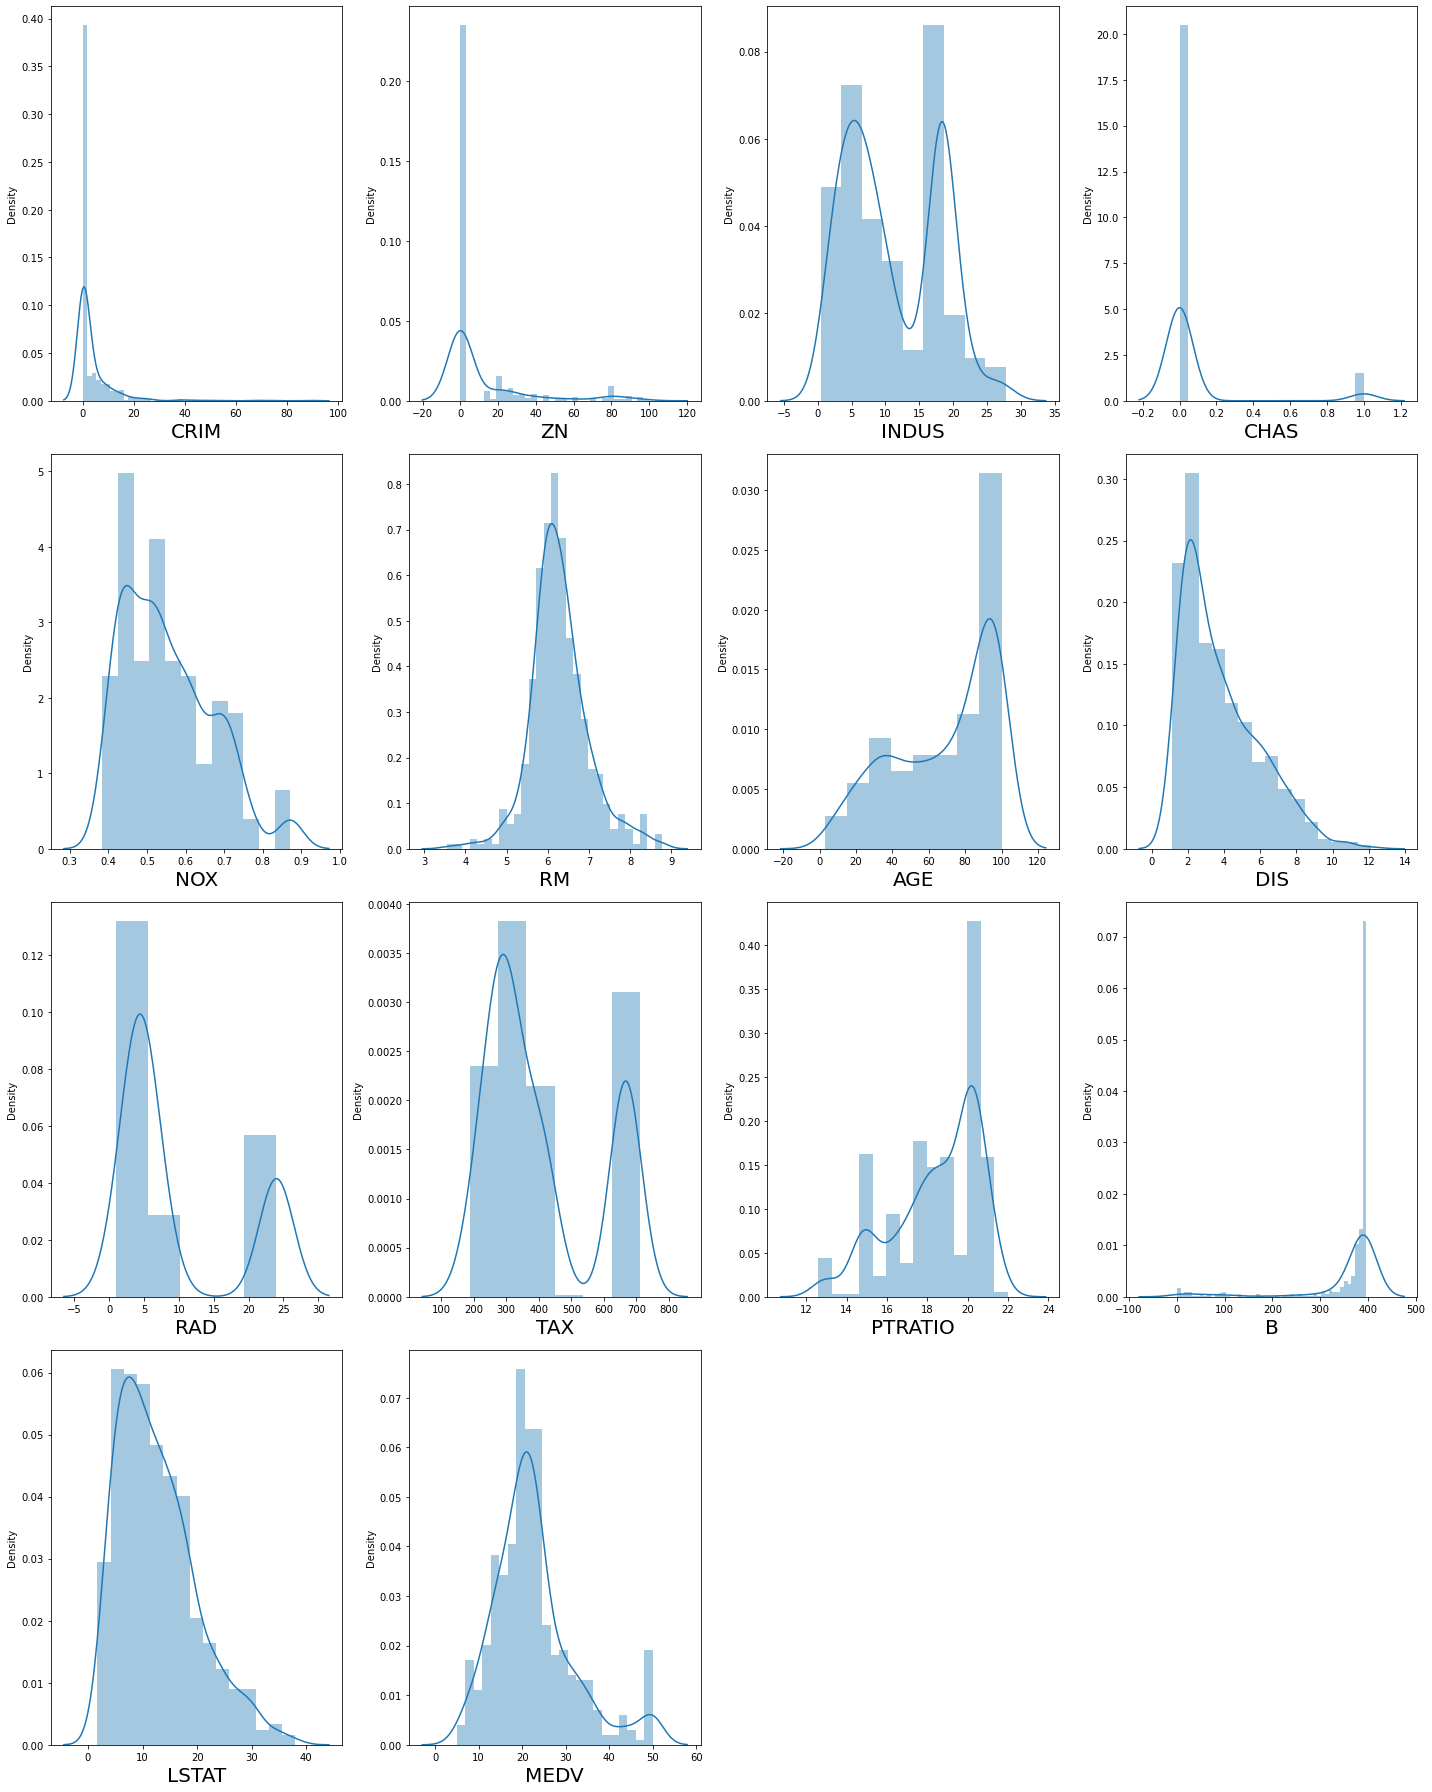

In [14]:
# let's see how data is distributed for every column(univariate analysis)
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

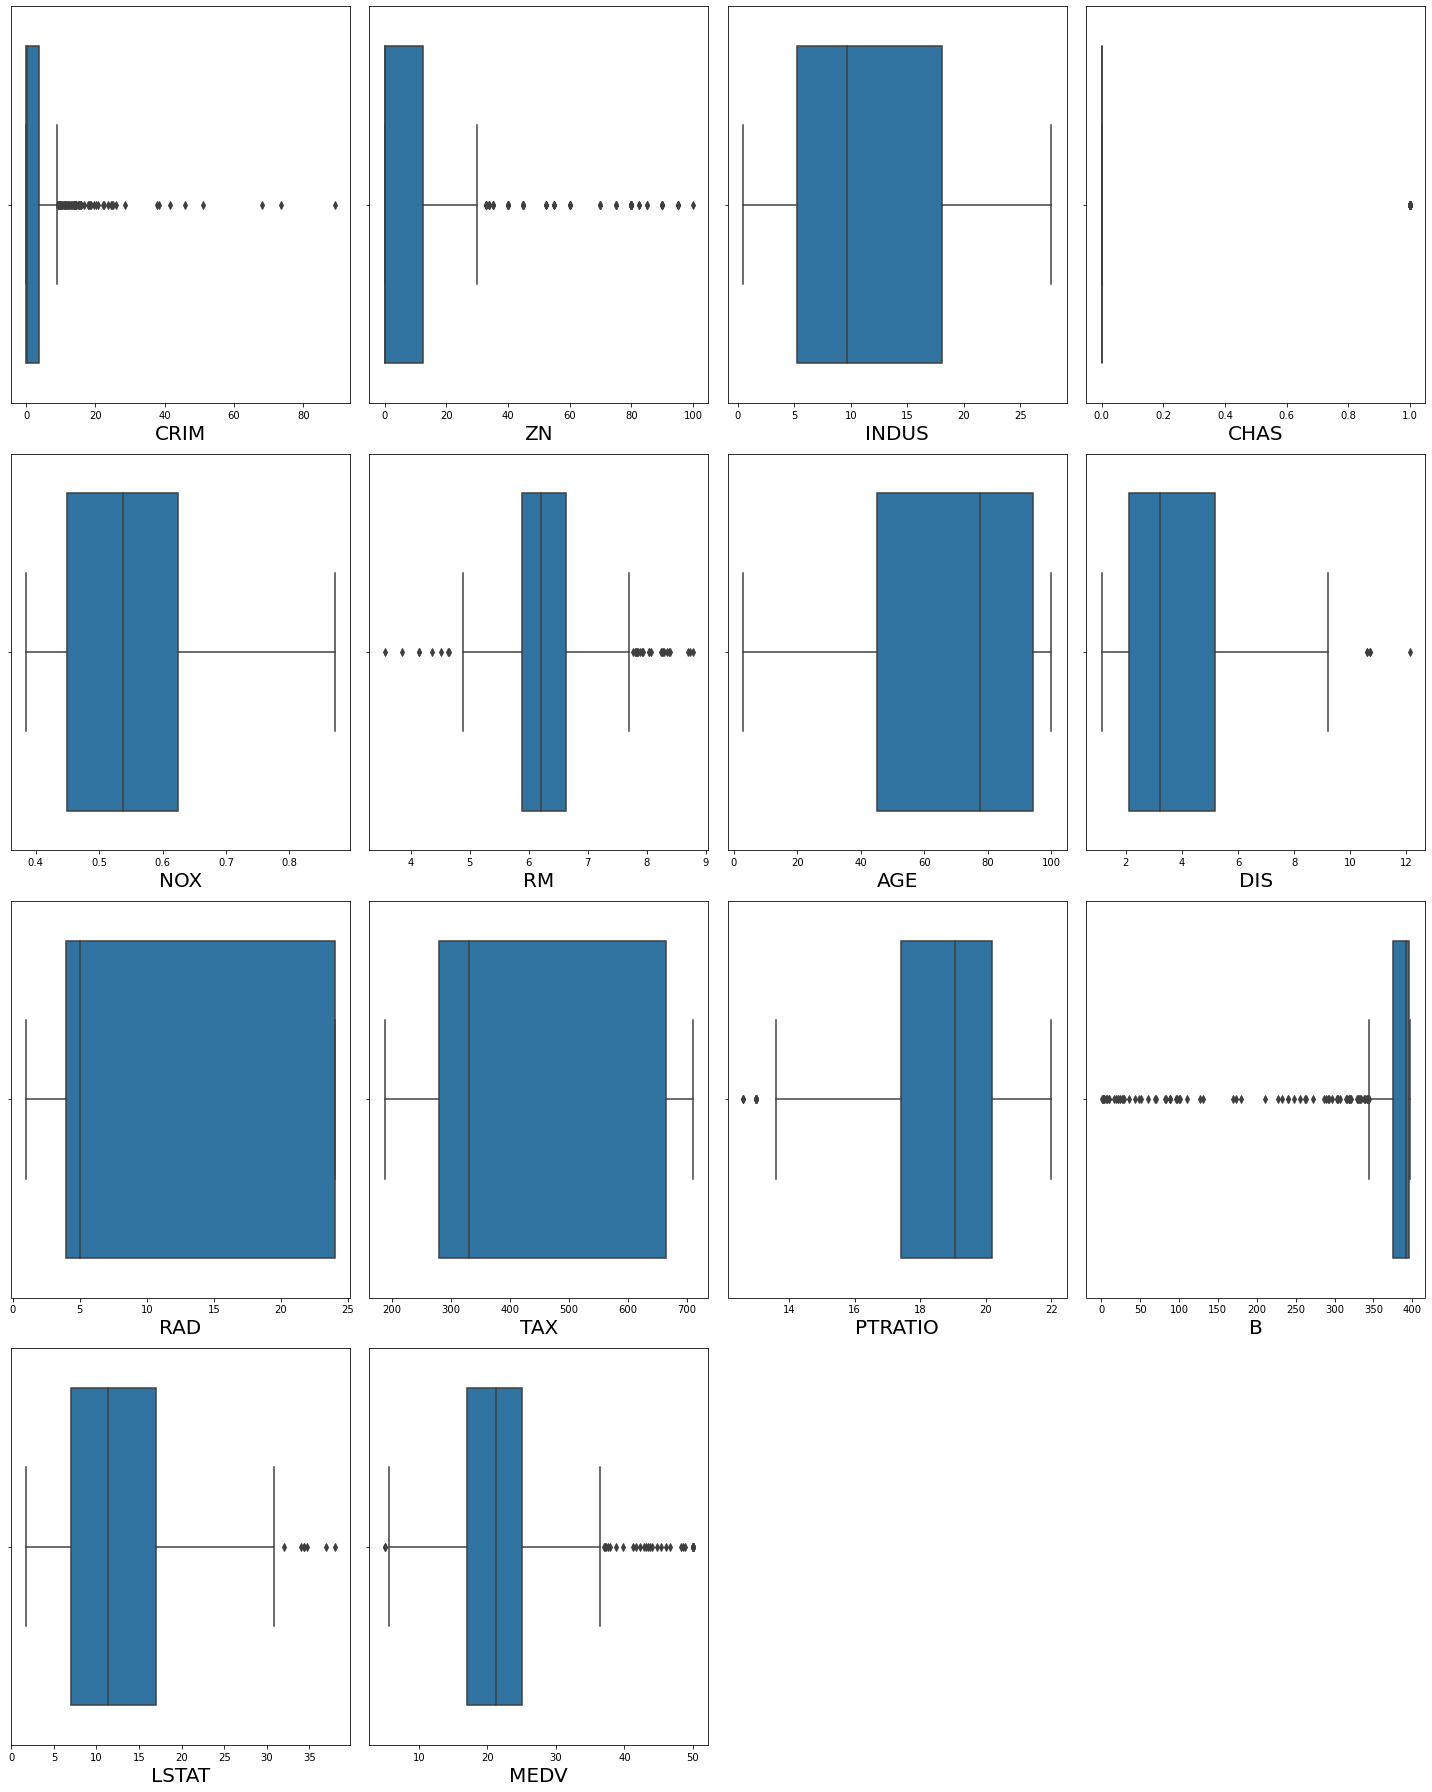

In [15]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=column,data=bos)
        plt.xlabel(column,fontsize=20)
#         plt.ylabel('MEDV',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

### column CHAS is categorical
### columns CRIM,ZN,NOX,DIS,LSTAT,MEDV look right skewed
### columns AGE, PTRATIO, B look left skewed
### columns INDUS, TAX are bimodal
### column RM looks normally distributed

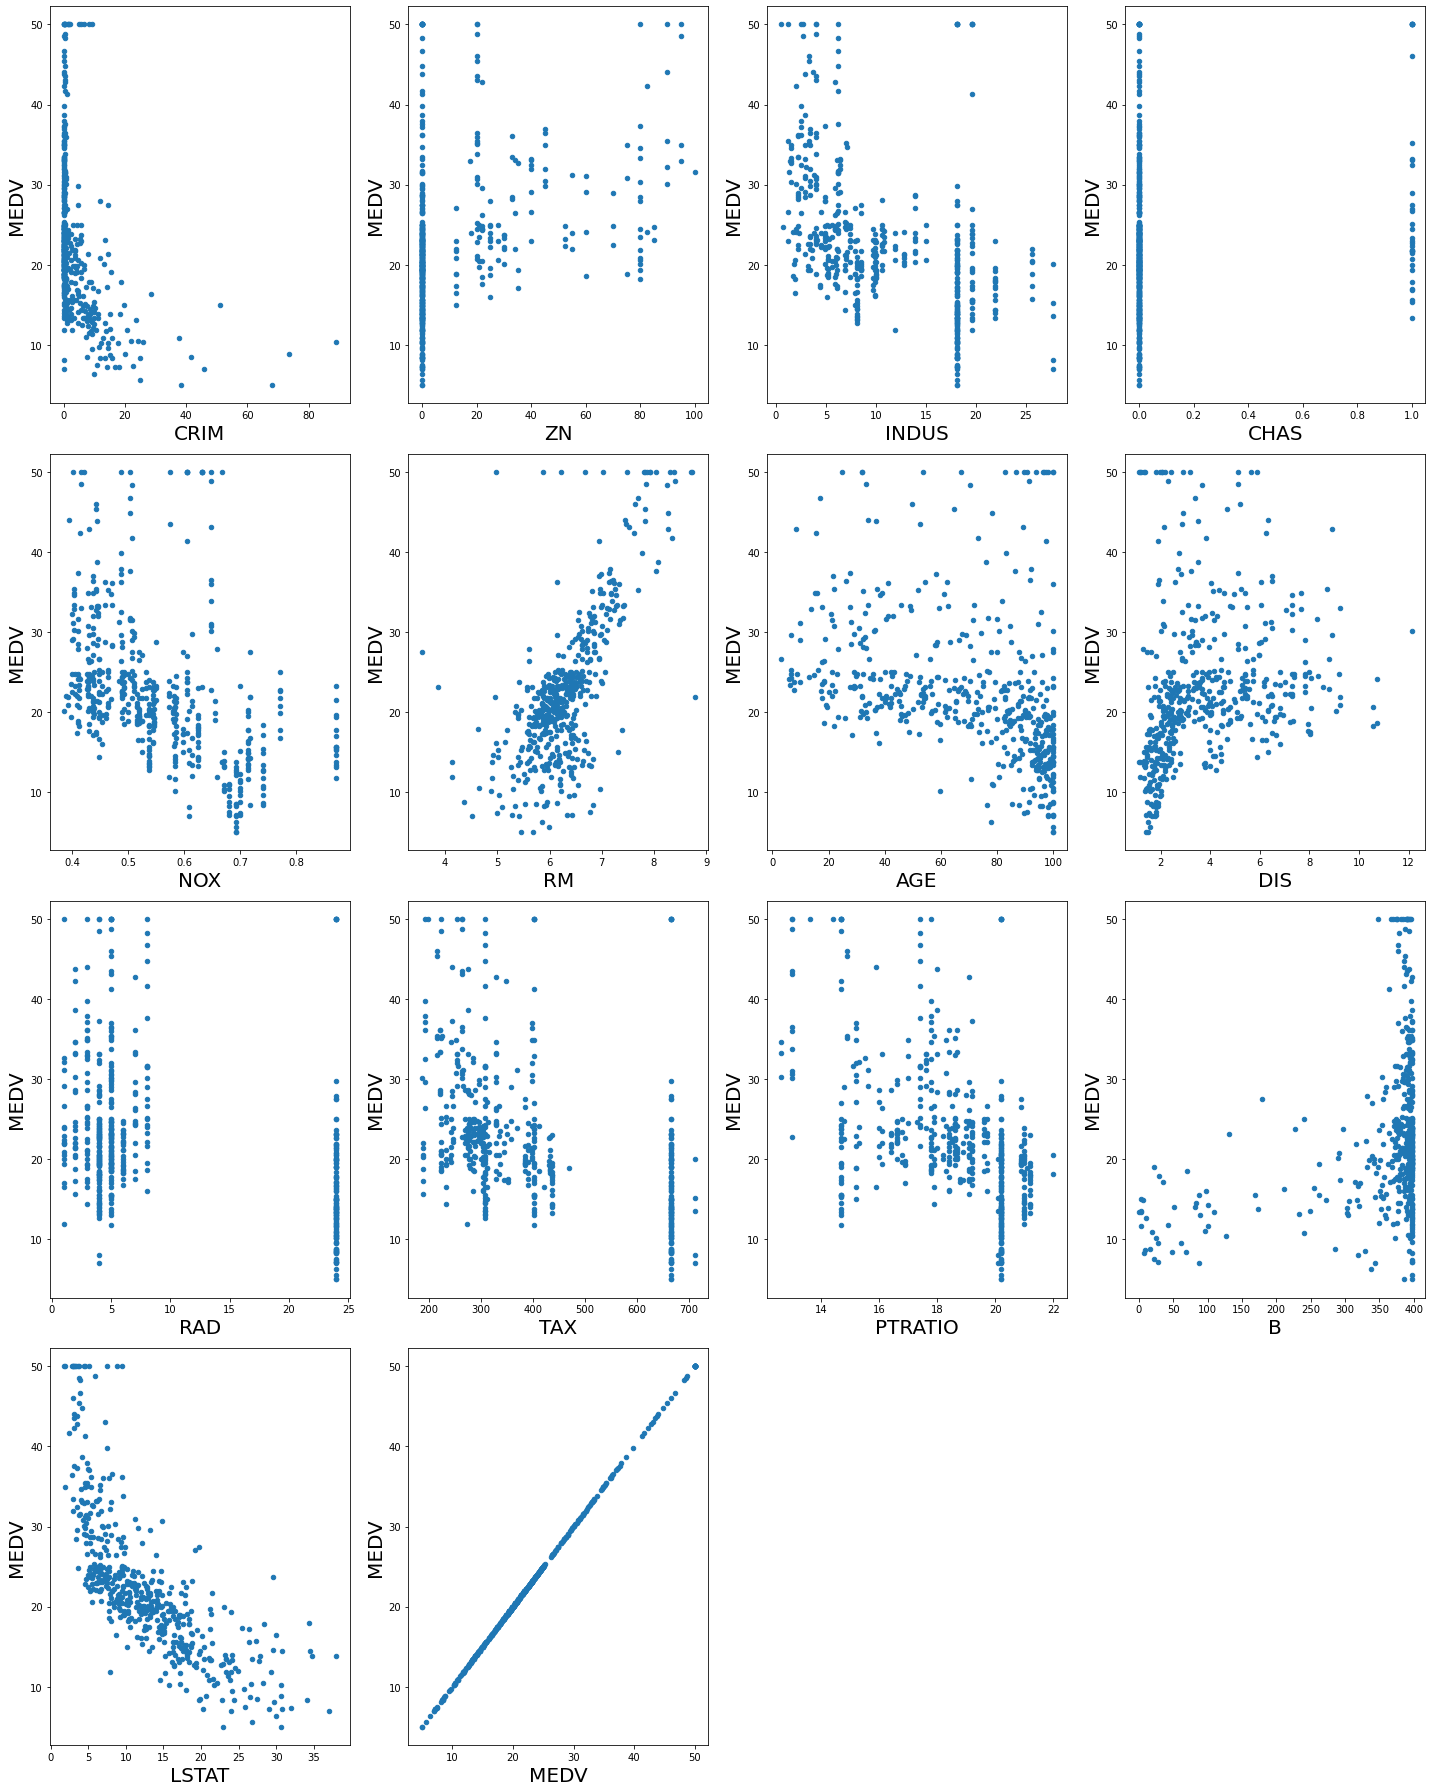

In [16]:
## Bivariate analysis against output variable


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        bos.plot.scatter(x =column, y = 'MEDV',ax=ax)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('MEDV',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

### Positive linear relation with RM, DIS (somewhat)
### Negative linear relation with LSTAT, NOX (somewhat), AGE (somewhat)

<AxesSubplot:>

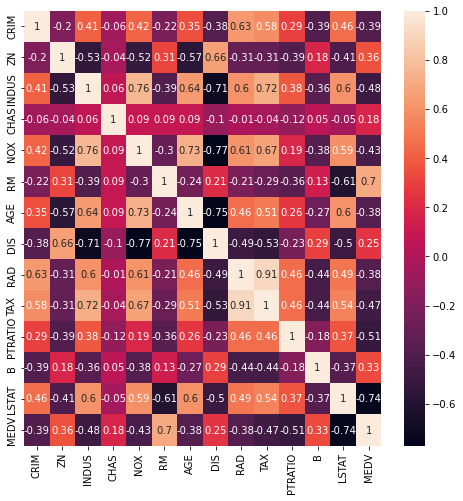

In [17]:
## corelation
plt.figure(figsize=(8,8), facecolor='white')
correlation_matrix =bos.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [41]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
bos_X_scaled = scalar.fit_transform(bos_X)
bos_X_scaled = pd.DataFrame(bos_X_scaled,columns=bos_X.columns)

In [42]:
## multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)

calc_VIF(bos_X_scaled)

,variables,VIF
0,CRIM,1.792192
1,ZN,2.298758
2,INDUS,3.991596
3,CHAS,1.073995
4,NOX,4.393720
5,RM,1.933744
6,AGE,3.100826
7,DIS,3.955945
8,RAD,7.484496
9,TAX,9.008554


In [44]:
x=bos_X.copy()
x.drop(['PTRATIO',"NOX",'TAX','RM','AGE','B','INDUS'], axis=1, inplace=True)
x_scaled = scalar.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)

In [45]:
calc_VIF(x_scaled)

,variables,VIF
0,CRIM,1.754030
1,ZN,1.850426
2,CHAS,1.029715
3,DIS,2.280462
4,RAD,1.943453
5,LSTAT,1.595156


In [22]:
X = bos_X
y = bos_y

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
mse=mean_squared_error(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.652033184880168
R2 score is 0.75




In [23]:
# model evaluation for test set

y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)
mse=mean_squared_error(y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")
print(mse)

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665328
R^2: 0.67


21.641412753226323


In [24]:
## outlier percentage
for k, v in bos.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(bos)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [25]:
##Let's remove MEDV outliers (MEDV = 50.0)
bos_1 = bos[(bos['MEDV'] < 50.0)]
print(np.shape(bos_1))

(490, 14)


In [26]:
for k, v in bos_1.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(bos_1)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.27%
Column ZN outliers = 13.27%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 4.69%
Column AGE outliers = 0.00%
Column DIS outliers = 1.02%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.65%
Column B outliers = 15.92%
Column LSTAT outliers = 1.43%
Column MEDV outliers = 4.49%


In [27]:
X = bos_1.drop(['MEDV'],axis=1)
y = bos_1['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
mse=mean_squared_error(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)
mse=mean_squared_error(y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")
print(mse)
print("\n")

# model evaluation for test set

y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)
mse=mean_squared_error(y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")
print(mse)

The model performance for training set
--------------------------------------
RMSE is 3.771170937139169
R2 score is 0.78


14.221730237123118


The model performance for training set
--------------------------------------
Root Mean Squared Error: 3.4721611233333647
R^2: 0.76


14.221730237123118


In [28]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
bos_2 = bos_1.drop(['MEDV'],axis=1)
bos_2=bos_2.loc[:,:]
x = pd.DataFrame(data=min_max_scaler.fit_transform(bos_2), columns=boston.feature_names)

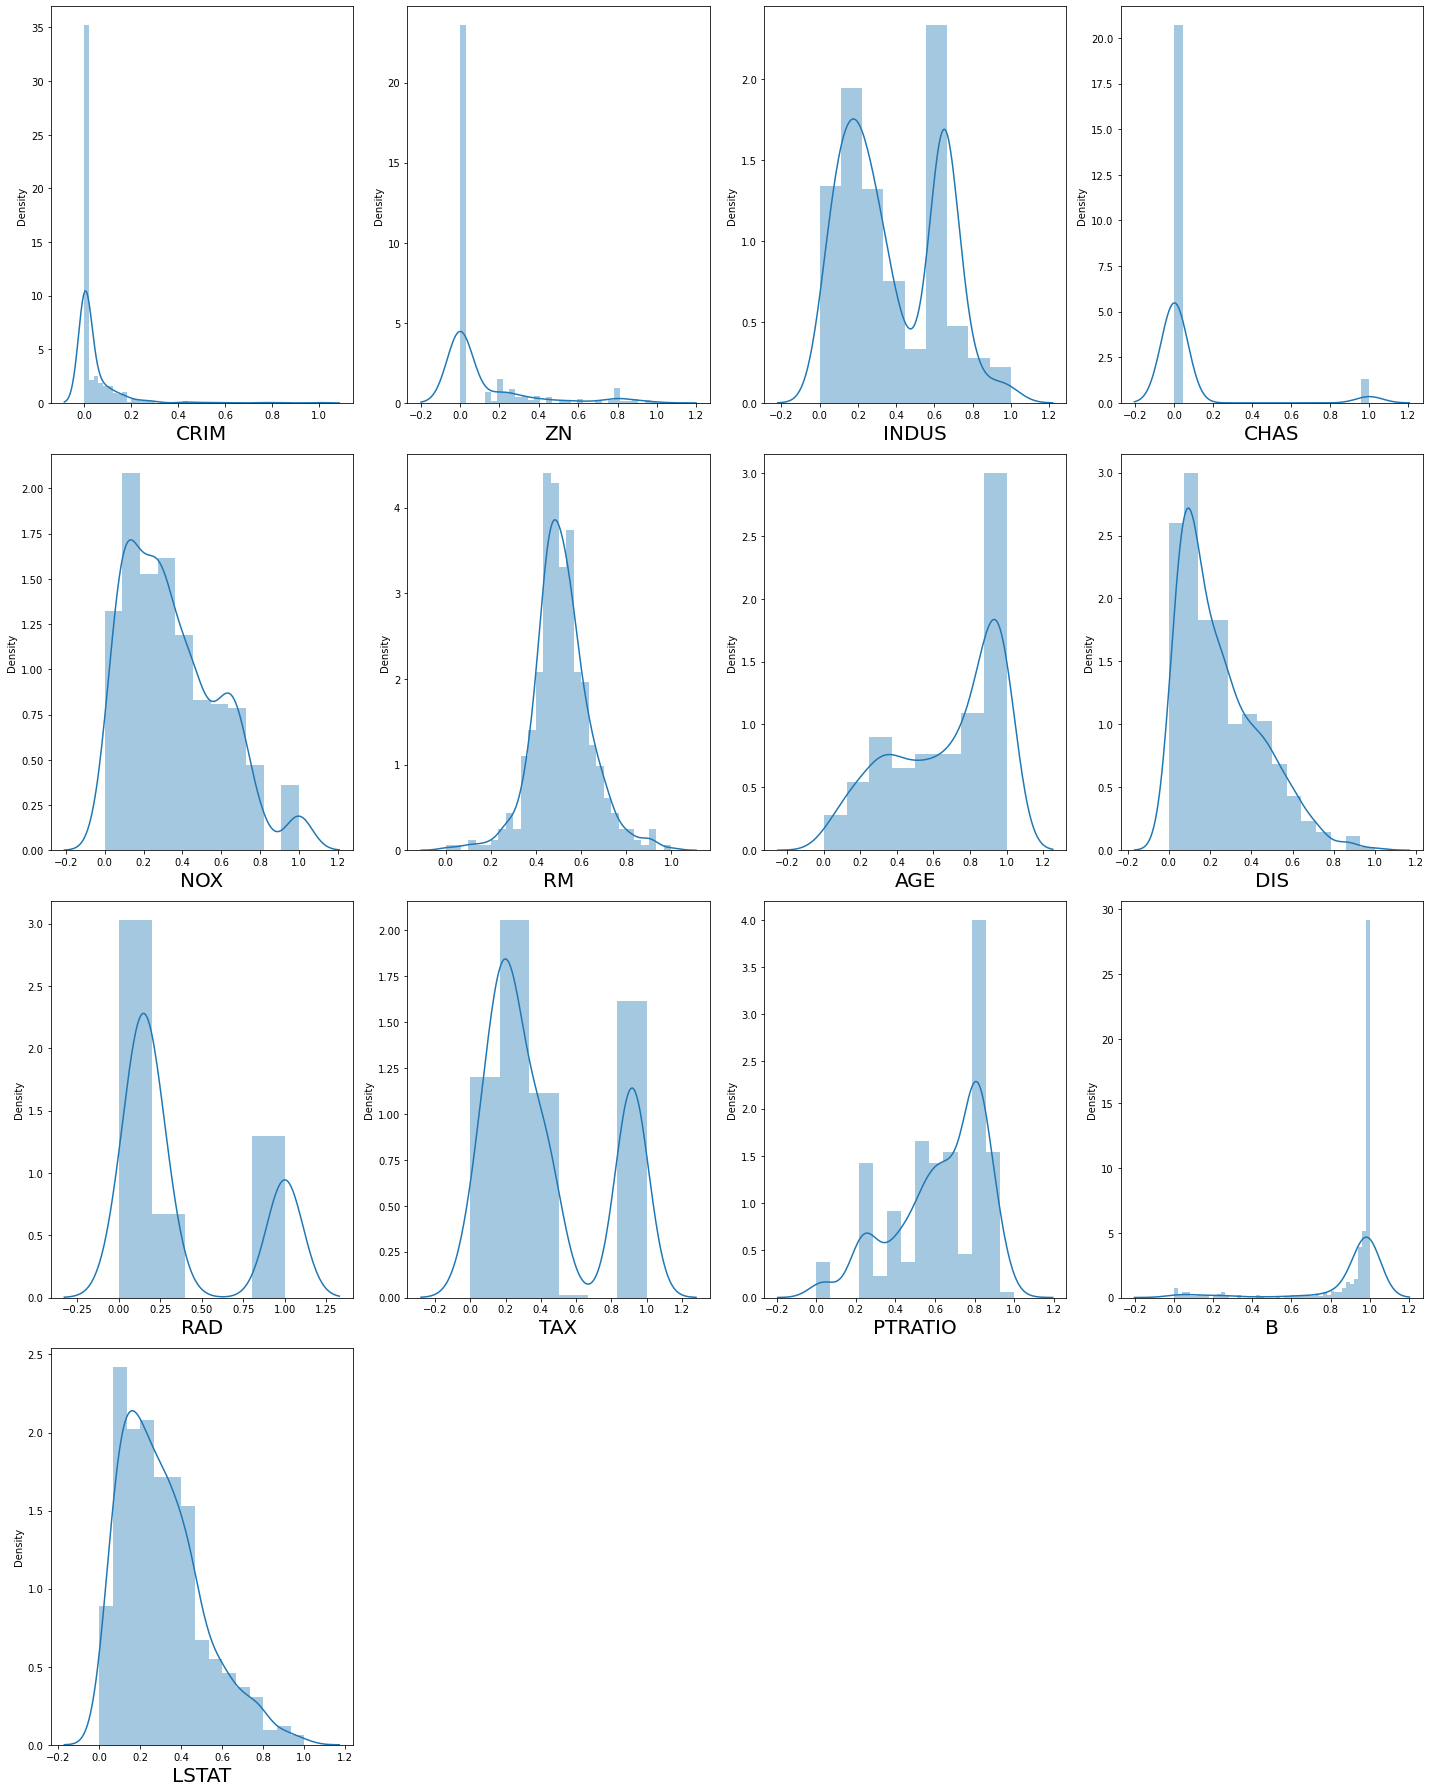

In [29]:
# let's see how data is distributed for every column(univariate analysis)
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [30]:
X = x
y = bos_1['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
mse=mean_squared_error(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)
mse=mean_squared_error(y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")
print(mse)
print("\n")

# model evaluation for test set

y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)
mse=mean_squared_error(y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")
print(mse)

The model performance for training set
--------------------------------------
RMSE is 3.771170937139169
R2 score is 0.78


14.221730237123118


The model performance for training set
--------------------------------------
Root Mean Squared Error: 3.4721611233333682
R^2: 0.76


14.221730237123118


In [31]:
# y =  np.log1p(bos_1['MEDV'])
bos_2 = bos_1.drop(['MEDV'],axis=1)
for col in bos_2.columns:
    if np.abs(bos_2[col].skew()) > 0.3:
        bos_2[col] = np.log1p(bos_2[col])

In [32]:
X = bos_2
y = bos_1['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
mse=mean_squared_error(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)
mse=mean_squared_error(y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")
print(mse)
print("\n")

# model evaluation for test set

y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)
mse=mean_squared_error(y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")
print(mse)

The model performance for training set
--------------------------------------
RMSE is 3.472383696174381
R2 score is 0.81


12.057448533457658


The model performance for training set
--------------------------------------
Root Mean Squared Error: 3.1796393162516874
R^2: 0.8


12.057448533457658


In [33]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
468,2.807938,0.0,2.949688,0.0,0.457425,5.926,4.276666,1.363128,3.218876,6.502790,3.054001,5.912800,2.951258
84,0.049352,0.0,1.702928,0.0,0.370874,6.389,3.891820,1.754300,1.386294,5.513429,2.970414,5.986201,2.362739
450,2.043519,0.0,2.949688,0.0,0.538246,6.749,4.539030,1.201049,3.218876,6.502790,3.054001,0.277632,2.914522
489,0.168366,0.0,3.358290,0.0,0.475613,5.414,4.598146,1.013563,1.609438,6.568078,3.049273,5.843689,3.217675
444,2.624835,0.0,2.949688,0.0,0.553885,5.854,4.580877,1.063192,3.218876,6.502790,3.054001,5.486952,3.210440


In [34]:
y_test.head()

468    19.1
84     23.9
450    13.4
489     7.0
444    10.8
Name: MEDV, dtype: float64

In [35]:
import pickle

In [36]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(reg_all, open(filename, 'wb'))

In [37]:
y_pred

array([13.91124757, 24.30881924, 12.94808556, 11.61954255, 11.83399499,
       19.81155005, 12.26999205, 36.56702874, 19.29285067, 28.07573809,
       19.19579227, 19.30638681,  8.5060181 , 15.3709052 , 16.18176421,
       25.37917742, 16.34815021, 15.79571534, 15.77816558, 21.83692046,
       20.62253074, 24.65214627, 11.71565522, 31.64848845, 21.91404289,
       22.59226947, 20.26574882, 34.58054049, 35.3421291 , 15.18587987,
       25.86870434, 15.44975466, 26.77538621, 25.61899667, 14.24934329,
       23.95400258, 29.01518151, 21.40769515, 33.2678901 , 28.98100247,
       14.1282402 , 17.96832869, 11.47269674, 18.11098147, 17.7943851 ,
       25.94077693, 16.90278821, 15.44017618, 20.66406819, 19.42815175,
       15.8759483 , 30.17664193, 30.11199236, 20.10040706, 18.13831401,
       25.70678953, 16.31345119, 27.64839517, 22.92700463, 12.84241181,
       21.29551989, 16.99370683, 23.76505091, 23.49530088, 22.70046944,
       39.96159703, 26.00783739, 26.92472677, 11.81198507, 19.19